<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex:

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.





Para el método de la secante se debe definir que la función sea continua en el rango donde se desea buscar el cero: $f(x)$ continua en el rango $[a,b]$

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:



El método de Newton-Raphson es una aproximación por rectas tangentes:


$$f(x) = \sum_{i=0}^{\infty}\frac{d^n}{dx^n}f(x)\Big|_{x=x}\frac{(x-x_0)}{n!}$$

$$ =  f(x) \Big|_{x=0} + f'(x)\Big|_{x=x_0} \frac{(x-x_0)}{1!} + \mathscr{o}(n^2) $$

$$ f(x)=  f(x_0)+ \frac{f'(x_0)(x-x_0)}{1!} + \mathscr{o}(n^2)$$

si $\alpha$ es el valor de x dónde la función se hace cero, se tiene:

$$f(x = \alpha ) = 0$$

$$0 = f(x_0)+ \frac{f'(x_0)(\alpha-x_0)}{1!} +  \mathscr{o}(n^2) $$   

$\mathscr{o}(n^2) $ tiende a 0

$$0 = f(x_0)+ f'(x_0)(\alpha-x_0) $$

$$(\alpha-x_0) = -\frac{f(x_0)}{f'(x_0)}$$

$$\alpha = x_0 -\frac{f(x_0)}{f'(x_0)}$$


Generalizando:

$$x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}$$

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?

***La diferencia entre NR y la secante, es que la secante usa la definición de la derivada, no la derivada como tal.***

d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera :

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation}

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation}
    \frac{df}{dx} = \sin x  
  \end{equation}

# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.


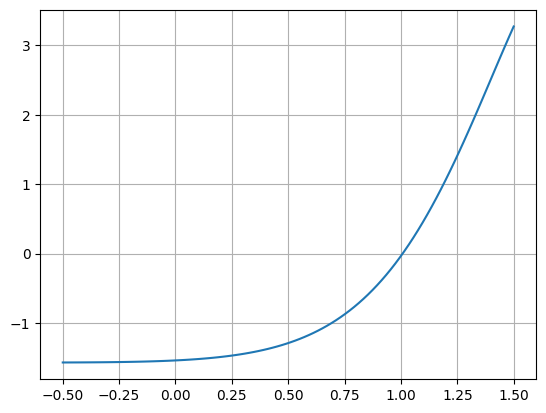

In [ ]:
from scipy import optimize as op
import matplotlib.pyplot as plt
import math as mt
import numpy as np

f = lambda x: np.exp(x)-2 - np.cos(np.exp(x)-2)
df = lambda x : (np.exp(x)*np.sin(np.exp(x)-2)) + np.exp(x)
x = np.linspace(-0.5,1.5,100)
y = f(x)
plt.figure
plt.plot(x,y)
plt.grid()

In [ ]:
a = 0.5
b = 1.25
epsilon = 1E-18

bisc = op.bisect(f,a,b,xtol= epsilon)
print( "Por método bisección x = ", bisc, ", f(x) = ", f(bisc))


newt = op.newton(f,b, fprime=df, tol = epsilon)
print( "Por m Newton-Raphson x = ", newt, ", f(x) = ", f(newt))

sec = op.newton(f,b, tol = epsilon)
print( "Por método   secante x = ", sec, ", f(x) = ", f(sec))

#op.fixed_point(f,)

Por método bisección x =  1.0076239716581366 , f(x) =  -3.3306690738754696e-16
Por m Newton-Raphson x =  1.0076239716581368 , f(x) =  4.440892098500626e-16
Por método   secante x =  1.0076239716581366 , f(x) =  -3.3306690738754696e-16


# 3. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguientes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8                #Aceleracion de la gravedad m/s2

params = (alpha, v0, b, u,g)  #Parametros en tupla.

```

In [ ]:
# Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8                #Aceleracion de la gravedad m/s2
params = (theta, alpha, v0, b, u,g)  #Parametros en tupla.



1. Defina dos funciones, una para x y otra para y.

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y

```

In [ ]:
# Posicion en x
def pos_x(t, theta, alpha, v0, b, u, g):
  #def pos_x(t, *params):
  x = ((u*np.cos(alpha))*t) + ((1/b)*((v0*np.cos(theta)-(u*np.cos(alpha)))*(1-np.exp(-b*t))))
  return x

# Posicion en y
def pos_y(t, theta, alpha, v0, b, u, g):
  #def pos_y(t, *params):
  #print("Parametros = ", params)
  y = ((1/b)*((g/b)+(v0*np.sin(theta))-(u*np.sin(alpha)))*(1-np.exp(-b*t))) - (((g/b)-(u*np.sin(alpha)))*t)
  #print("valores de y = ", y)
  return y

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [ ]:
t = np.linspace(0,10, 1000)
x = pos_x(t, theta, alpha, v0, b, u, g)
y = pos_y(t, theta, alpha, v0, b, u, g)

dic = {"X":x, "Y": y, "Tiempo":t}

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.

In [ ]:
import pandas as pd
df = pd.Series(dic)

4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["Tiempo"], df["Y"]).

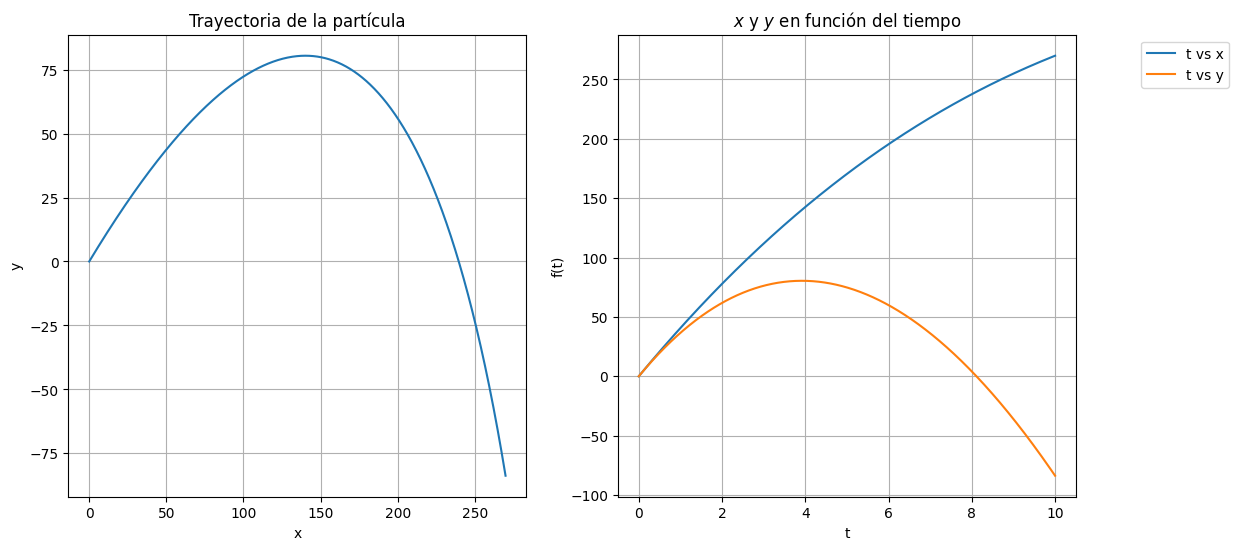

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(13, 6))
axs[0].plot(df["X"], df["Y"], label="x vs y")
axs[0].set_title("Trayectoria de la partícula")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].plot(df["Tiempo"], df["X"], label="t vs x")
axs[1].plot(df["Tiempo"], df["Y"], label="t vs y")
axs[1].set_title("$x$ y $y$ en función del tiempo")
axs[1].set_xlabel("t")
axs[1].set_ylabel("f(t)")
axs[1].legend(bbox_to_anchor=(1.35, 1))
axs[0].grid()
axs[1].grid()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.

In [ ]:
x0 = 6
epsilon = 1E-18
sec = op.newton(pos_y,x0,args=params, tol = epsilon)
print( "Por método   secante t = ", sec, ", f(t) = y = ", pos_y(sec,theta, alpha, v0, b, u, g))

t = np.linspace(0,8.112, 1000)
x = pos_x(t, theta, alpha, v0, b, u, g)
y = pos_y(t, theta, alpha, v0, b, u, g)

dic = {"X":x, "Y": y, "Tiempo":t}

Por método   secante t =  8.111627022095577 , f(t) = y =  0.0


6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.


In [ ]:
def trayectoria(angulos, alpha, v0, b, u, g):
  for thet in angulos:
    theta = np.deg2rad(thet)
    parameters = (theta, alpha, v0, b, u,g)
    tv = op.newton(pos_y,6,args=parameters)
    t = np.linspace(0,tv,100)
    x = pos_x(t, theta, alpha, v0, b, u,g)
    y = pos_y(t, theta, alpha, v0, b, u,g)
    plt.plot(x,y)
  plt.grid()


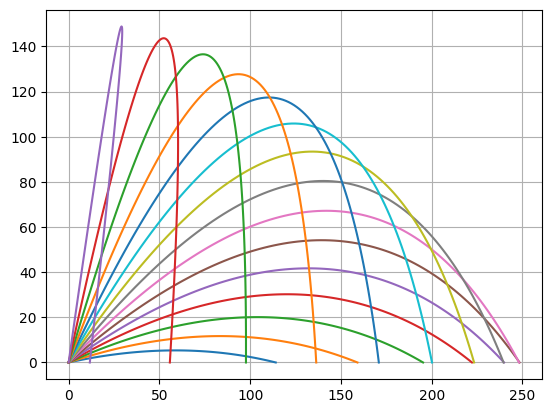

In [ ]:

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion
g = 9.8
angulos = np.arange(10,85,5)
trayectoria(angulos, alpha, v0, b, u, g)

# 4. Fixed point methods.

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius.

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.





$$M = 4\pi \int_0^R \rho(r)r^2dr$$

$$M(R) = 4\pi \int_0^R \rho_0 e^{ \left( -\frac{r}{L} \right)}r^2dr $$

$$M(R) = 4\pi\rho_0  \int_0^R e^{ \left( -\frac{r}{L} \right)}r^2dr $$

$$M(R) = 4\pi\rho_0   \left(-Le^{ \left( -\frac{r}{L} \right)}r^2 +2L\left(-Lre^{ \left( -\frac{r}{L} \right)} - L^2e^{ \left( -\frac{r}{L} \right)}\right) \right) \Big|_0^R $$

$$M(R) = 4\pi\rho_0   \left(-Le^{ \left( -\frac{r}{L} \right)}r^2 -2L\left(Lre^{ \left( -\frac{r}{L} \right)} + L^2e^{ \left( -\frac{r}{L} \right)}\right) \right) \Big|_0^R $$


$$M(R) = 4\pi\rho_0   \left(-Le^{ \left( -\frac{r}{L} \right)}\left(r^2 +2Lr+2L^2\right)  \Big|_0^R \right) $$



$$M(R) = 4\pi\rho_0   \left(-Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) - \left(-Le^{ \left( -\frac{0}{L} \right)}\left(0^2 +2L0+2L^2\right)\right) \right) $$

$$M(R) = 4\pi\rho_0   \left(-Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) + \left(L\left(2L^2\right)\right) \right) $$


$$M(R) = 4\pi\rho_0   \left(2L^3-Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) \right) $$

$$\frac{M(R)}{4\pi\rho_0} =  2L^3-Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) $$

$$\frac{M(R)}{4\pi\rho_0} - 2L^3+Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) = 0 $$


sí tenemos que $M(R) = M_{g832c} = 5.40 M_{\oplus}$

$$\frac{5.40 M_{\oplus}}{4\pi\rho_0} - 2L^3 + Le^{ \left( -\frac{R}{L} \right)}\left(R^2 +2LR+2L^2\right) = 0 $$

In [97]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

In [98]:
L = sp.Symbol("L")
r = sp.Symbol("r")
rho0 = sp.Symbol("rho0")
R = sp.Symbol("R")
M_t = sp.Symbol("M_t")
M = sp.Symbol("M")
rho = lambda r: rho0*sp.exp(-r/L)
rho(r)

sp.integrate((r**2)*rho(r),(r,0,R))

2*L**3*rho0 + (-2*L**3*rho0 - 2*L**2*R*rho0 - L*R**2*rho0)*exp(-R/L)

In [99]:
L = 6500E3        # [m]
r_t = 6371E3      # [m] radio de la Tierra
rho_t = 5520      # [kg/m^3] densidad de la Tierra
rho_t = 1.3       # [kg/m^3] densidad del nucleo de la Tierra
rho0 = 18000      # [kg/m^3] densidad del centro del planeta
M_t = 5.9722E24   # [kg] masa de la Tierra
M = 5.4*M_t       # [kg] masa del nuevo planeta
params = (rho0,L,M)
params_t = (rho_t,L,M_t)
epsilon = 1E-18

In [108]:
def fun(R,rho0,L,M):
  f = (M/(4*rho0*np.pi)) - (2*(L**3)) + (L*np.exp(-R/L)*(R**2 + (2*L*R) + (2*(L**2))))
  return f

def masa(R,rho,L):
  M = (4*rho*np.pi)*((2*(L**3)) - (L*np.exp(-R/L)*(R**2 + (2*L*R) + (2*(L**2)))))
  return M


In [150]:
R_sec = op.newton(fun, 5*r_t, args = params, tol = epsilon)
print( "Por método secante R = ", round(R_sec/(1E3) , 2), " km, f(R) = ", fun(sec,rho0,L,M))


R = np.linspace(0,1.4*R_sec,1000)
f = fun(R, rho0,L,M)
m = masa(R, rho0, L)
mas = masa(R_sec, rho0,L)

R_encontrado = round(R_sec/(1E3) , 2)
M_encontrada = round(mas/(1E24),2)
R_n = round(R_sec/r_t , 2)    # radio en términos de cantidad de veces el radio de la Tierra
M_n = round(mas/M_t,2)        # masa en términos de cantidad de veces la masa de la Tierra


print("El radio encontrado es de ", R_encontrado, " km, equivalente a ",R_n," veces el radio de la Tierra")
print("La masa encontrada es de ", M_encontrada, " kg x10^24, equivalente a ",M_n," veces la masa de la Tierra")

Por método secante R =  11461.69  km, f(R) =  5.647929158908713e+19
El radio encontrado es de  11461.69  km, equivalente a  1.8  veces el radio de la Tierra
La masa encontrada es de  32.25  kg x10^24, equivalente a  5.4  veces la masa de la Tierra


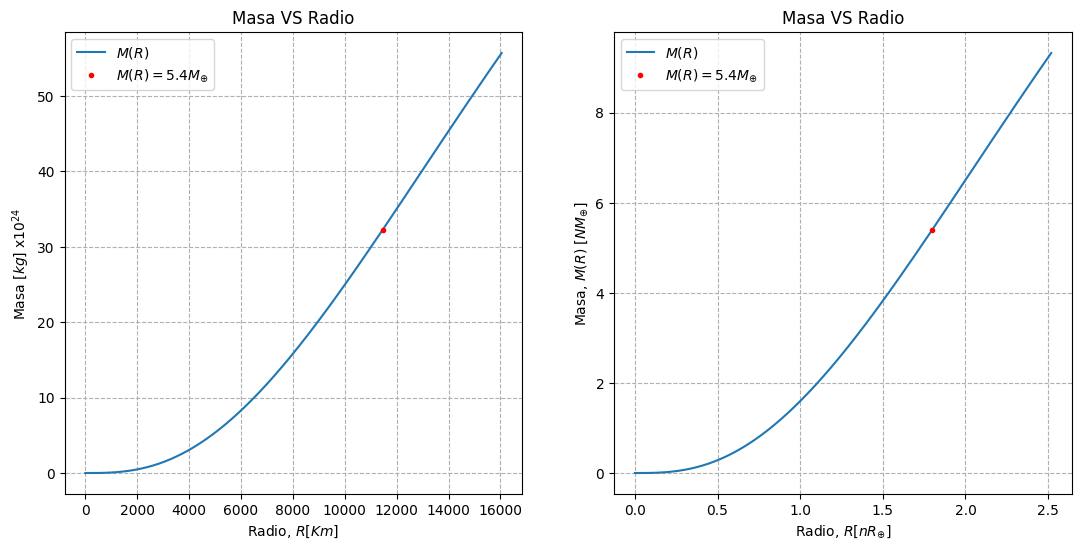

In [149]:
m1 = m/(1E24)
R1 = R/(1E3)
fig, axs = plt.subplots(1, 2,figsize=(13, 6))

axs[0].plot(R1,m1, label = "$M(R)$")
axs[0].plot(R_sec/(1E3),mas/(1E24), "r.", label = "$M(R) = 5.4 M_{\oplus}$")
axs[0].set_title("Masa VS Radio")
axs[0].set_xlabel("Radio, $R [Km]$")
axs[0].set_ylabel("Masa $[kg]$ x$10^{24}$")
axs[0].grid(linestyle="--")
axs[0].legend()

R2 = R/r_t
m2 = m/M_t
mas2 = mas/M_t

axs[1].plot(R2,m2, label = "$M(R)$")
axs[1].plot(R_sec/r_t,mas2, "r.", label = "$M(R) = 5.4 M_{\oplus}$")
axs[1].set_title("Masa VS Radio")
axs[1].set_xlabel("Radio, $R [nR_{\oplus}]$")
axs[1].set_ylabel("Masa, $M(R)$ $[N M_{\oplus}]$")
axs[1].legend()
axs[1].grid(linestyle="--")



# 5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}



```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```

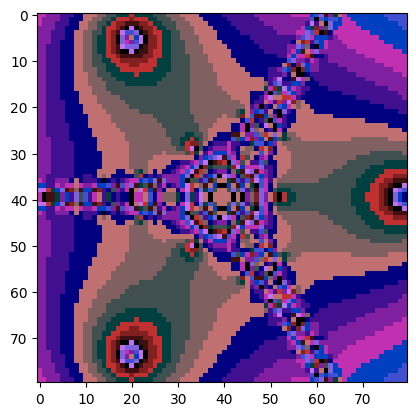

In [140]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)